Enter the rotation angle :- 90


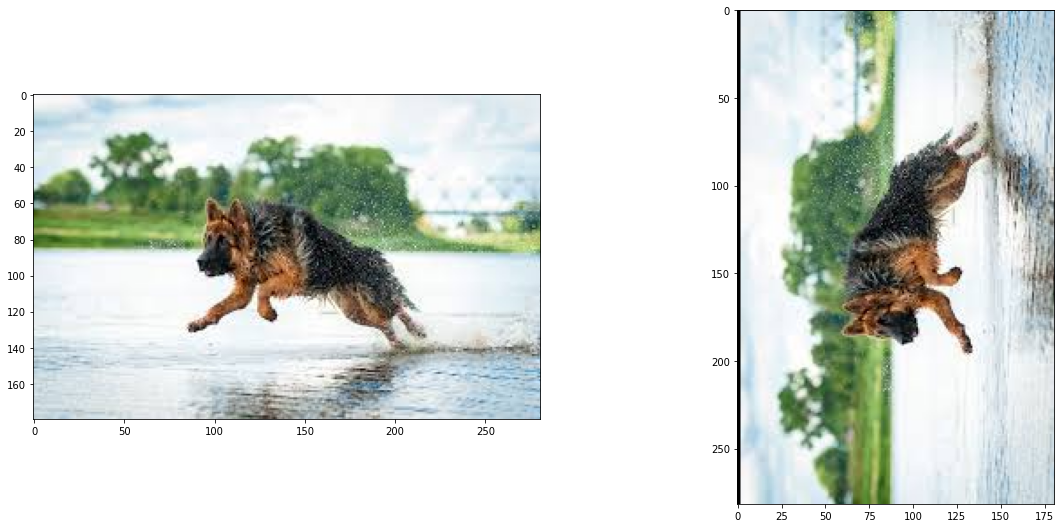

In [94]:
import numpy as np
import math 
from PIL import Image
import matplotlib.pyplot as plt

img = np.array(Image.open(".\\Dog.jpg"))             # Load the image
Input_height = img.shape[0]
Input_width = img.shape[1]
Input_dims = img.shape[2]

angle=int(input("Enter the rotation angle :- "))

angle=math.radians(angle)   
cosine=math.cos(angle)
sine=math.sin(angle)

# Y1 = Y0 Cos(Theta) + x0 Sin(Theta)
Output_height = round(abs(Input_height*cosine) + abs(Input_width*sine))+1

# X1 = x0 Cos(Theta) + Y0 Sin(Theta)
Output_width = round(abs(Input_width*cosine)+abs(Input_height*sine))+1

# Create an empty  image
Output_Image = np.zeros((Output_height,Output_width,Input_dims))

# Find center of original image
Input_center_height = round((Input_height+1)/2)
Input_center_width = round((Input_width+1)/2)

# Find the center of the  new image on which rotated points are drwan 
output_canter_height = round((Output_height+1)/2)
output_canter_width = round((Output_width+1)/2)

for i in range(Input_height):
    for j in range(Input_width):
        
        #co-ordinates of pixel with respect to the centre of original image
        y=Input_height-1-i-Input_center_height                   
        x=Input_width-1-j-Input_center_width                      

        #co-ordinate of pixel with respect to the rotated image
        new_y=round(-x*sine+y*cosine)
        new_x=round(x*cosine+y*sine)
        
        '''since image will be rotated the centre will change too, 
           so to adust to that we will need to change new_x and new_y with respect to the new centre'''
        new_y=output_canter_height-new_y
        new_x=output_canter_width-new_x

        # adding if check to prevent any errors in the processing
        if 0 <= new_x < Output_width and 0 <= new_y < Output_height and new_x>=0 and new_y>=0:
            Output_Image[new_y,new_x,:]=img[i,j,:]      



pil_img=Image.fromarray((Output_Image).astype(np.uint8))                       # converting array to image

plt.figure(figsize=(20,20)) # specifying the overall grid size

plt.axis('off')

plt.subplot(2, 2, 1)
plt.imshow(img)

plt.subplot(2, 2, 2)
plt.imshow(pil_img)

